# EECE 550 HW 2 Question 5: Cuk Converter
Shelby Quiring, 10157162, March 15th 2024

In [7]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import sympy as sp
import control as ctr
import control.matlab as ctrm

In [8]:
# Input Parameters
Vi = 10  # V
Vo = 5  # V
R = 1  # Ohms 

# Calculate duty cycle and control constants
D = Vo / (Vo + Vi)
Io = Vo / R
Ii = Vo/Vi * Io

Vc1 = Vi + Vo
IL1 = Ii
IL2 = Io

# Component values
L1 = 1e-3
L2 = 1e-3
C1 = 1e-3
C2 = 1e-3

# Define matricies
gamma = np.diag([L1, L2, C1, C2])

alpha = np.array([
    [ 0,    0,  -(1-D), 0  ],
    [ 0,    0,   D,     1  ],
    [ 1-D, -D,   0,     0  ],
    [ 0,   -1,   0,    -1/R]
])

# This contains input ripple and duty cycle
# beta = np.array([
#     [1,   Vc1],
#     [0,   Vc1], 
#     [0,  -(IL1 + IL2)],
#     [0,   0]
# ])

# This contains only duty cycle as an input
beta = np.array([
    [Vc1],
    [Vc1], 
    [-(IL1 + IL2)],
    [0]
])


A = np.linalg.inv(gamma) @ alpha
B = np.linalg.inv(gamma) @ beta
C = np.array([0, 0, 0, -1])
D_ = np.array([0])

print(f'A: \n{A}\n')
print(f'B: \n{B}\n')

# Check controllability
ctr_rank = np.linalg.matrix_rank(ctr.ctrb(A, B))
print(f'Controllability Rank: {ctr_rank}\n')

# Make state space model
sys = ctr.ss(A, B, C, D_)
print('Linearized Model:')
display(sys)

# Check stability
e, V = sci.linalg.eig(A)
print('\nEigvals of A Matrix:')
print(e)

A: 
[[    0.             0.          -666.66666667     0.        ]
 [    0.             0.           333.33333333  1000.        ]
 [  666.66666667  -333.33333333     0.             0.        ]
 [    0.         -1000.             0.         -1000.        ]]

B: 
[[15000.]
 [15000.]
 [-7500.]
 [    0.]]

Controllability Rank: 4

Linearized Model:


<LinearIOSystem:sys[20]:['u[0]']->['y[0]']>


Eigvals of A Matrix:
[ -87.62066844+683.34546466j  -87.62066844-683.34546466j
 -412.37933156+875.40197973j -412.37933156-875.40197973j]


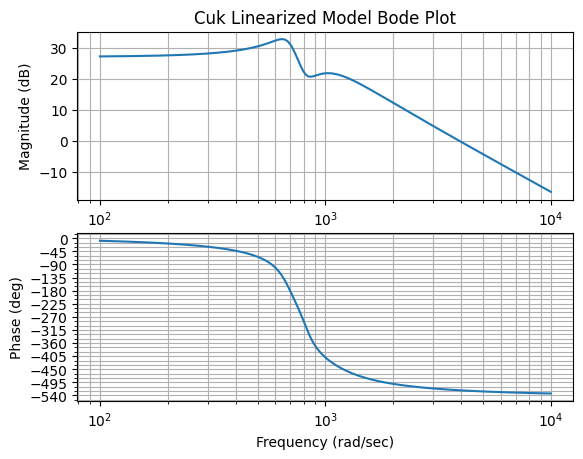

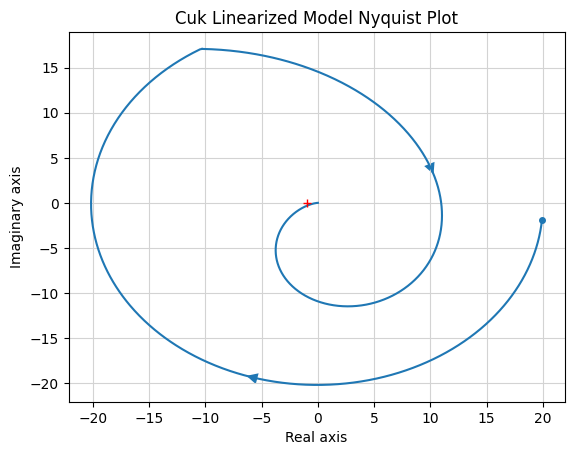

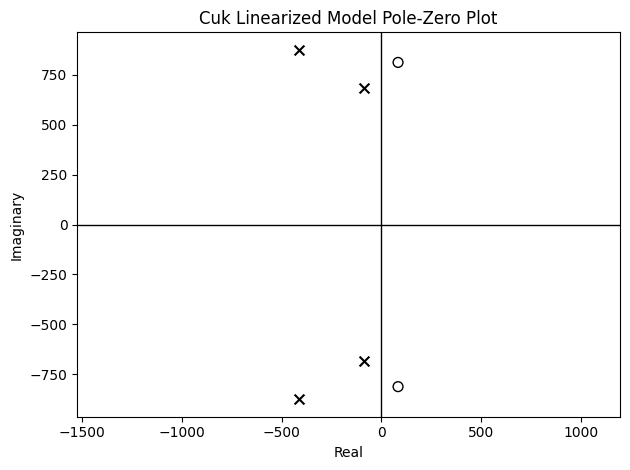

In [9]:
# Look at the frequency response and other control plots
fvec = np.logspace(1, 4, 10000)
omegavec = fvec * 2 * np.pi

fig = plt.figure()
ctr.bode_plot(sys)#, magnitude_label='Cuk Linearized Model Bode Plot')
fig.axes[0].set_title('Cuk Linearized Model Bode Plot')

fig, ax = plt.subplots()
ctr.nyquist(sys, omegavec, primary_style=['-', '-'], mirror_style=False)
ax.set_title('Cuk Linearized Model Nyquist Plot')

fig = plt.figure() 
ctr.pzmap(sys)
plt.title('Cuk Linearized Model Pole-Zero Plot')
fig.tight_layout()


Text(0.5, 0, 'Time [s]')

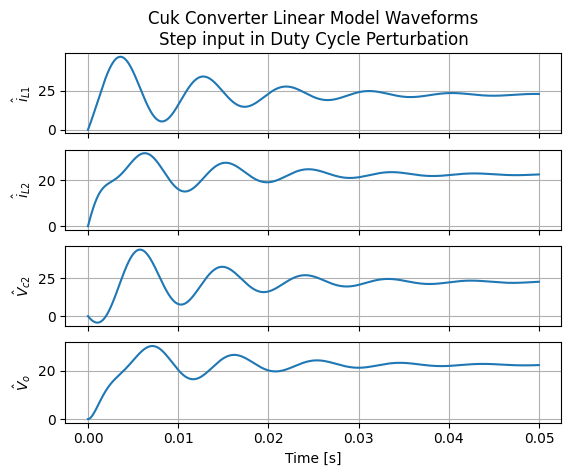

In [10]:
# Simulate the state space model and compare it to PSIM
time = np.arange(0, 0.05, 1e-5)
# u = np.array([np.zeros_like(time), np.ones_like(time)]).T # u for full system
u = np.ones_like(time).T # u for reduced system
y, t, x = ctrm.lsim(sys, u, time)

fig, ax = plt.subplots(4, 1, sharex=True)

ax[0].set_title('Cuk Converter Linear Model Waveforms\nStep input in Duty Cycle Perturbation')

p = 0
ax[p].plot(time, x[:, 0])
ax[p].set_ylabel('$\hat{i}_{L1}$')
ax[p].grid('enable')

p += 1
ax[p].plot(time, x[:, 1])
ax[p].set_ylabel('$\hat{i}_{L2}$')
ax[p].grid('enable')

p += 1
ax[p].plot(time, x[:, 2])
ax[p].set_ylabel('$\hat{V}_{c2}$')
ax[p].grid('enable')

p += 1
ax[p].plot(time, y)
ax[p].set_ylabel('$\hat{V}_o$')
ax[p].grid('enable')


ax[p].set_xlabel('Time [s]')

Control-To-Output Transfer Function Equation:


-Ro*(Do*(Do*L_1*V_C1 + L_1*L_2*S*(I_L1 + I_L2) + L_2*V_C1*(Do - 1)) - V_C1*(C_1*L_1*L_2*S**2 + Do**2*L_2 + L_1*(Do - 1)**2))/(C_2*L_2*Ro*S**2*(C_1*L_1*L_2*S**2 + Do**2*L_2 + L_1*(Do - 1)**2) - Do**2*L_1*Ro + L_2*S*(C_1*L_1*L_2*S**2 + Do**2*L_2 + L_1*(Do - 1)**2) + Ro*(C_1*L_1*L_2*S**2 + Do**2*L_2 + L_1*(Do - 1)**2))

Evaluated:


(1.5e-8*S**2 - 2.5e-6*S + 0.01)/(1.0e-15*S**4 + 1.0e-12*S**3 + 1.55555555555556e-9*S**2 + 5.55555555555556e-7*S + 0.000444444444444444)

Coefficient Arrays:

Num: [1.5e-08, -2.5e-06, 0.01]
Den: [1e-15, 1e-12, 1.5555555555555555e-09, 5.555555555555555e-07, 0.00044444444444444447]

Transfer Function:



TransferFunction(array([ 1.5e-08, -2.5e-06,  1.0e-02]), array([1.00000000e-15, 1.00000000e-12, 1.55555556e-09, 5.55555556e-07,
       4.44444444e-04]))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


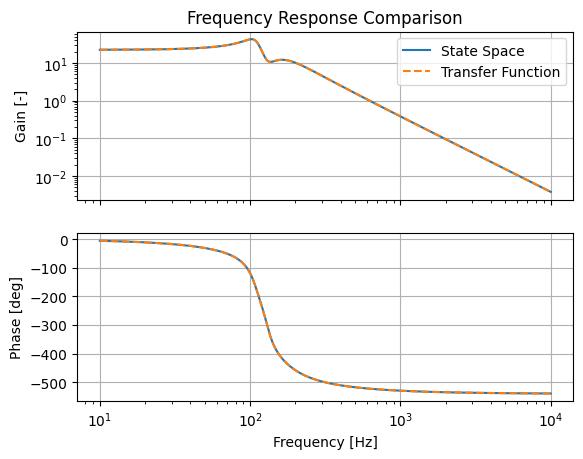

In [11]:
# Get the transfer function and compare to the state space model
# Define symbols for symbolic calculation
L_1, L_2, C_1, C_2, I_L1, I_L2, V_C1, Ro, Do, S = sp.symbols('L_1 L_2 C_1 C_2 I_L1, I_L2 V_C1 Ro Do S')

# Define intermediate transfer functions
G1 = -(I_L1 + I_L2) - Do*V_C1/(S*L_2) + (1-Do)*V_C1/(S*L_1)
G2 = S*C_1 + Do**2/(S*L_1) + (1-Do)**2/(S*L_2)
G3 = S*C_2 + 1/Ro + 1/(S*L_2) - Do**2/(S**2*L_2**2*G2)
G4 = Do*G1 / (S*L_2*G2) + V_C1/(S*L_2)


# Define control to output transfer function
G_tot = sp.simplify(G4 / G3)
print('Control-To-Output Transfer Function Equation:')
display(G_tot)

# Evaluate the expression
substitution = [ # Replace symbolic varibles with real ones
    (L_1, L1),
    (L_2, L2),
    (C_1, C1),
    (C_2, C2),
    (I_L1, IL1),
    (I_L2, IL2),
    (V_C1, Vc1),
    (Ro, R),
    (Do, D)
]

G_tot_result = G_tot.subs(substitution).evalf().simplify()
print('Evaluated:')
display(G_tot_result)

# Create a transfer function object
num = [float(x) for x in G_tot_result.as_numer_denom()[0].as_poly().all_coeffs()]
den = [float(x) for x in G_tot_result.as_numer_denom()[1].as_poly().all_coeffs()]
H = ctr.tf(num, den)

print('Coefficient Arrays:\n')
print(f'Num: {num}')
print(f'Den: {den}')

# print(f'Num: {np.array(num) / den[0]}')
# print(f'Den: {np.array(den) / den[0]}')


print('\nTransfer Function:\n')
display(H)

# Plot the bode plot using this transfer function and compare to the state space model
fig, ax = plt.subplots(2, 1, sharex=True)
mss, pss, _ = ctrm.freqresp(sys, omegavec)
mtf, ptf, _ = ctrm.freqresp(H, omegavec)
ax[0].loglog(fvec, mss, label='State Space')
ax[0].loglog(fvec, mtf, '--', label='Transfer Function')
ax[0].grid('enable')
ax[0].legend()
ax[0].set_title('Frequency Response Comparison')
ax[0].set_ylabel('Gain [-]')

ax[1].semilogx(fvec, np.unwrap(pss) * 180 / np.pi, label='State Space')
ax[1].semilogx(fvec, np.unwrap(ptf) * 180 / np.pi, '--', label='Transfer Function')
ax[1].grid('enable')
ax[1].set_xlabel('Frequency [Hz]')
ax[1].set_ylabel('Phase [deg]')

# Save the figure
plt.savefig(f'figs/cuk_freqresp.eps', format='eps')